In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plthelper import *

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

In [2]:
filename = "mdom_radioactivity_0.dat"
sensor_directory = "mDOM"
output_directory = "../files/output/"
path = output_directory + "background/" + filename

data = pd.read_csv(path, sep = "\t", header = None)
data.columns = ["Event ID", "Time [ns]", "Energy [eV]", "PMT ID", "HIT POS X [m]", "HIT POS Y [m]", "HIT POS Z [m]", "VER POS X [m]", "VER POS Y [m]", "VER POS Z [m]", "?", "?", "?"]
data

,Event ID,Time [ns],Energy [eV],PMT ID,HIT POS X [m],HIT POS Y [m],HIT POS Z [m],VER POS X [m],VER POS Y [m],VER POS Z [m],?,?,?
0,0,4.786286e+09,3.486071,3,-0.021161,-0.075171,0.160450,-0.018344,-0.080783,0.177272,4,0,NaN
1,0,4.786286e+09,2.883272,3,0.005226,-0.068894,0.166856,-0.018344,-0.080784,0.177272,4,0,NaN
2,0,4.786287e+09,3.579217,3,-0.010653,-0.078547,0.162835,-0.018325,-0.080777,0.177260,4,0,NaN
3,0,4.786286e+09,3.708526,3,-0.020844,-0.069604,0.162367,-0.018360,-0.080789,0.177282,4,0,NaN
4,0,4.786290e+09,3.844299,3,-0.017611,-0.064290,0.164697,-0.018337,-0.080781,0.177267,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51526,878,2.052485e+11,3.193717,17,-0.072360,-0.131584,-0.068788,-0.065002,-0.159658,-0.052420,3412,0,NaN
51527,878,7.438482e+10,2.706626,17,-0.055224,-0.144245,-0.043208,-0.065002,-0.159658,-0.052420,1683,0,NaN
51528,878,7.438482e+10,2.664450,17,-0.048308,-0.145253,-0.063058,-0.065002,-0.159658,-0.052420,1683,1,NaN
51529,878,7.438482e+10,3.079071,17,-0.063192,-0.135189,-0.074794,-0.065002,-0.159658,-0.052420,1683,0,NaN


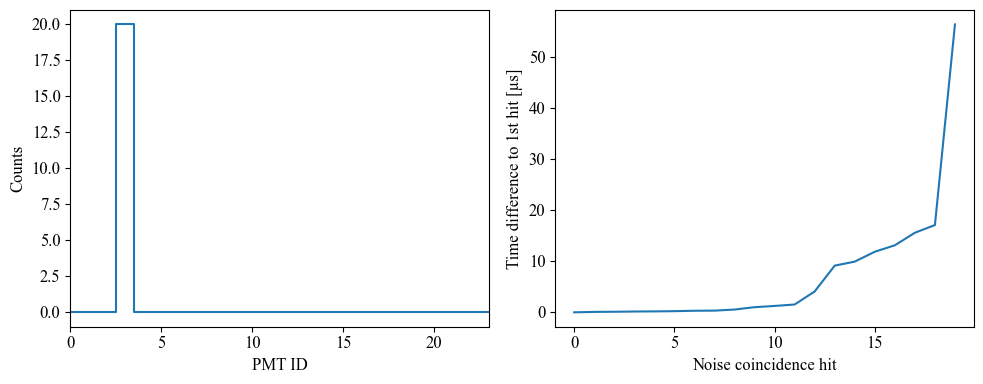

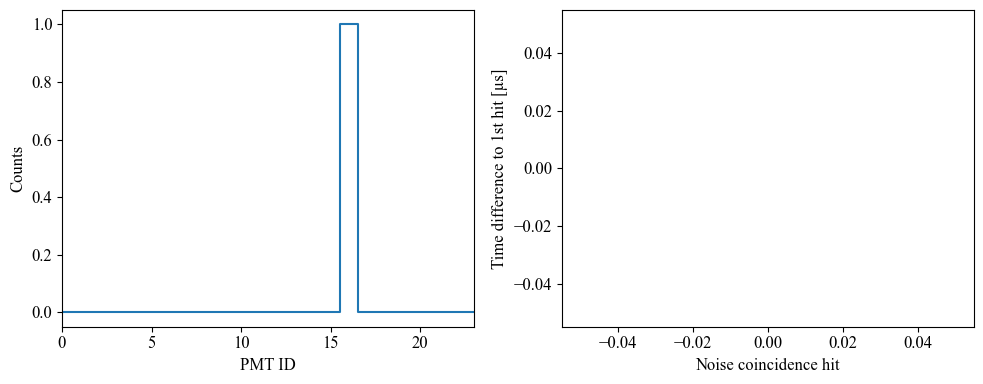

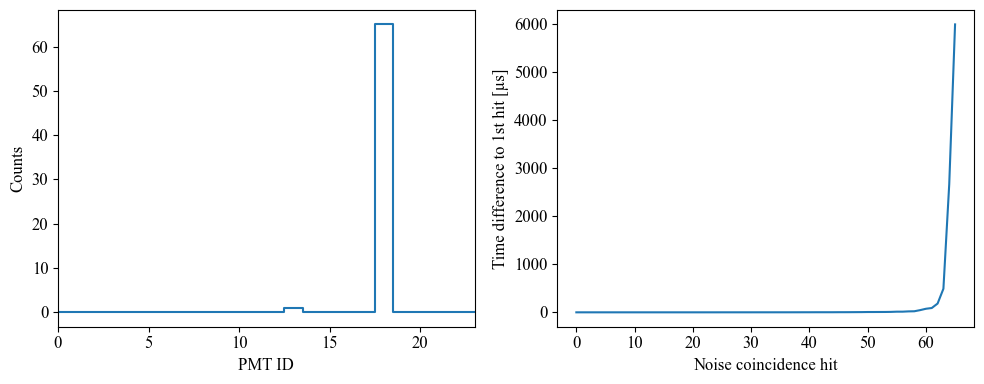

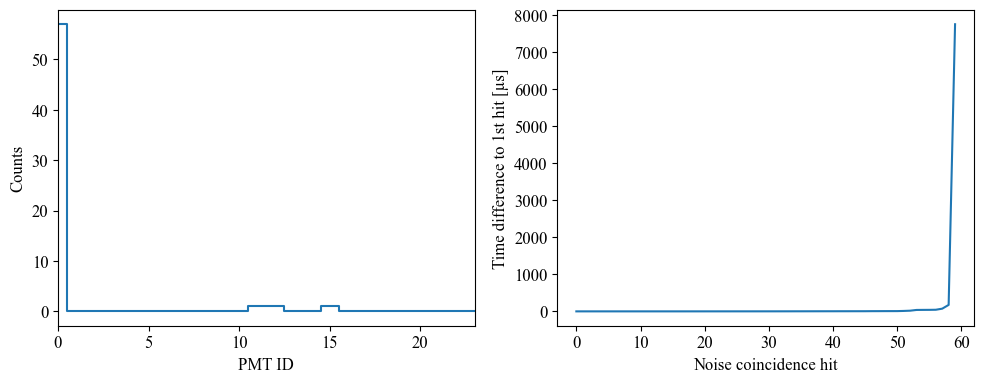

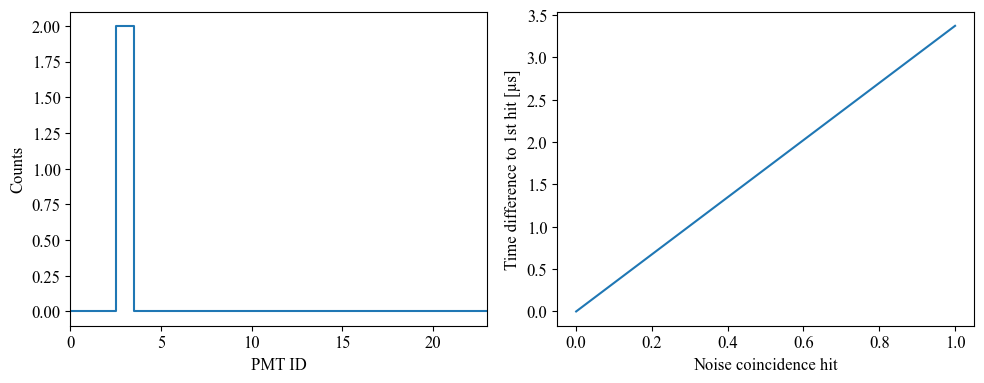

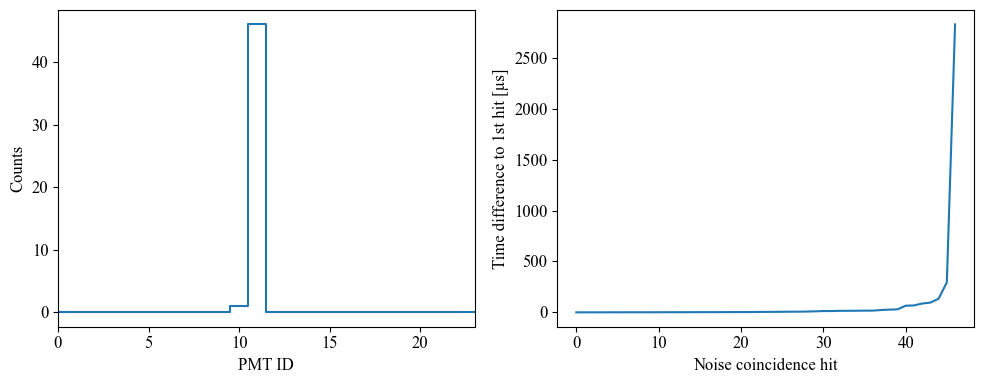

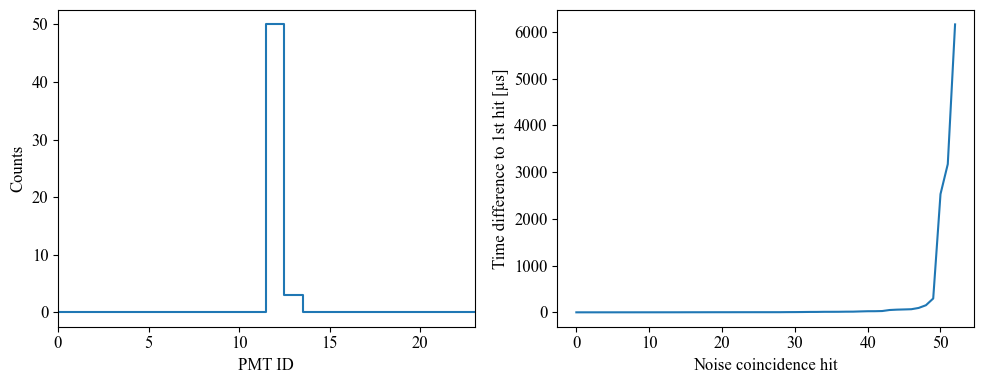

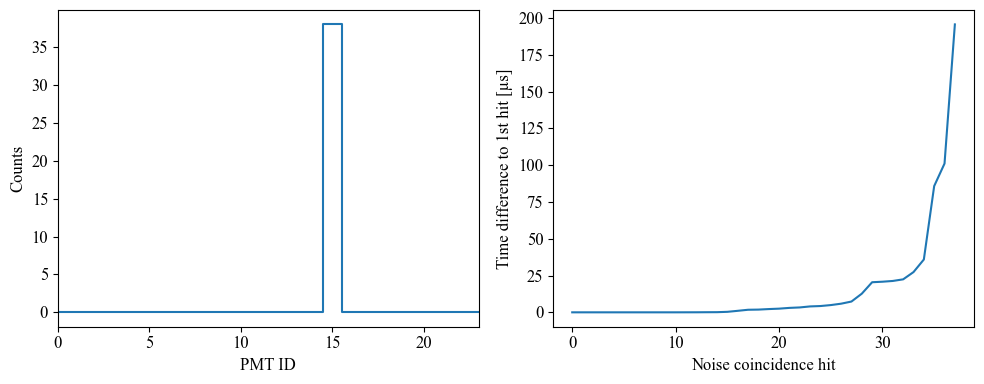

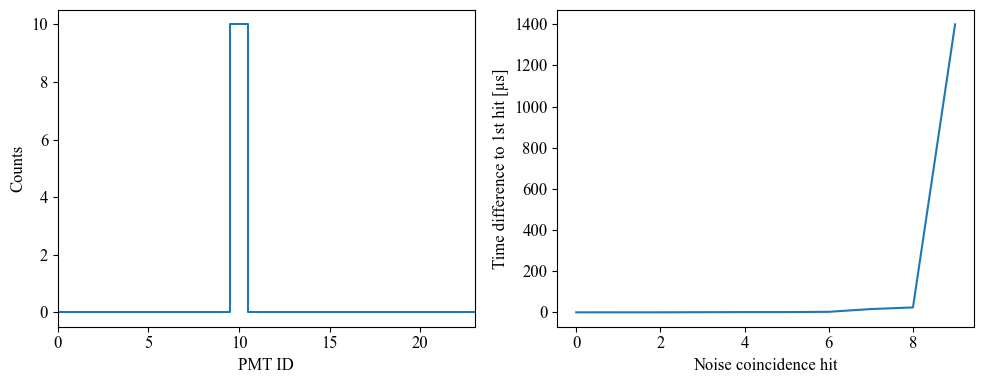

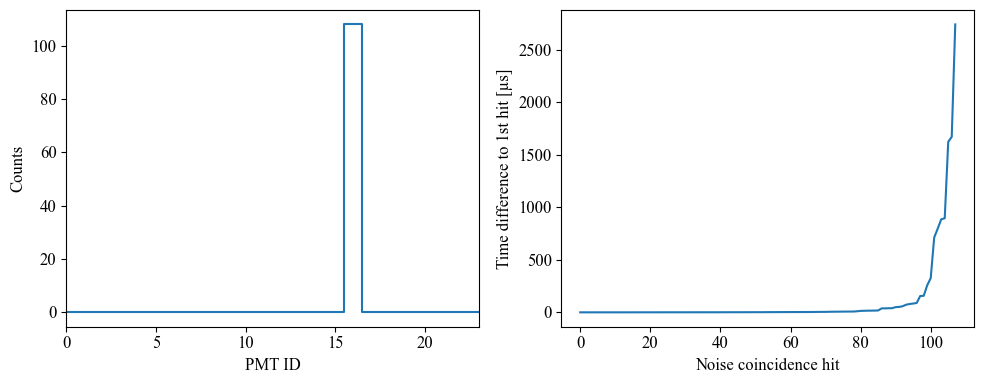

In [3]:
eventID = 0
for eventID in range(10):
    eventmask = (data.iloc[:,0]==eventID).values
    time = data.iloc[:,1][eventmask]
    time = np.sort(time)
    dtime = time-time[0]

    y, bins = np.histogram(data.iloc[:,3][eventmask].values, bins = 24, range = (-0.5,23.5))
    x = (bins[:-1]+bins[1:])/2
    fig, ax = plt.subplots(1,2, figsize = (10,4))
    ax[0].step(x, y, where = "mid")
    ax[0].set_xlim(0,23)
    ax[0].set_xlabel("PMT ID")
    ax[0].set_ylabel("Counts")

    ax[1].plot(dtime/1E3) # in µs
    ax[1].set_xlabel("Noise coincidence hit")
    ax[1].set_ylabel("Time difference to 1st hit [µs]")
    plt.tight_layout()

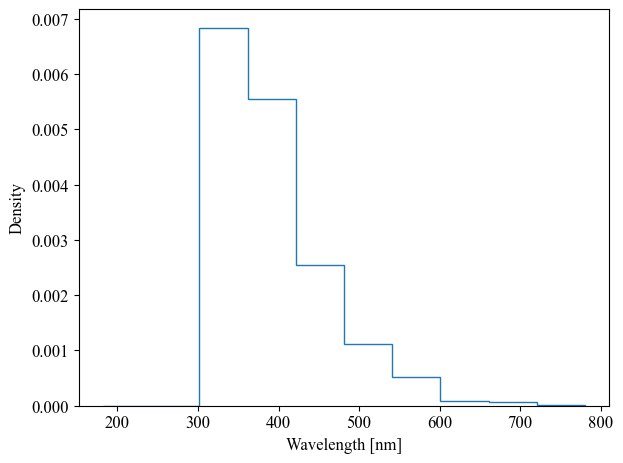

In [4]:
energy = data.iloc[:,2].values
plot_spectrum(energy)

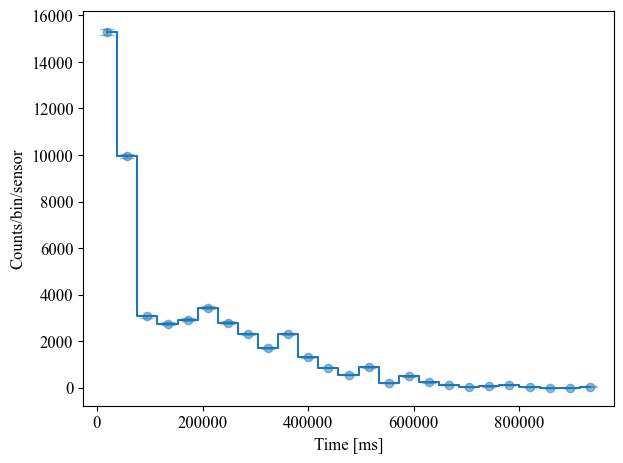

In [5]:
time = data.iloc[:,1].values
plot_lightcurve(time)

Text(0, 0.5, 'time stamp [s]')

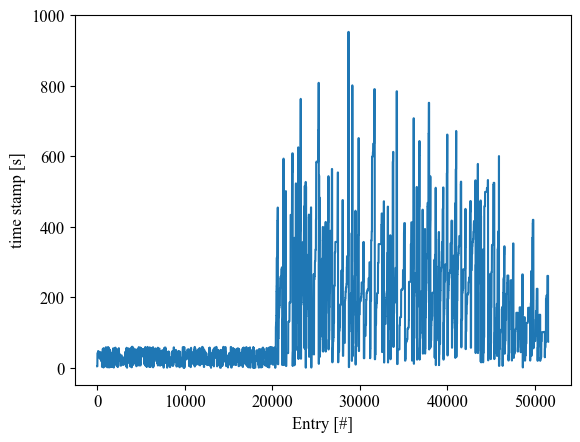

In [6]:
plt.plot(data.iloc[:,1]/1E9)
plt.xlabel("Entry [#]")
plt.ylabel("time stamp [s]")

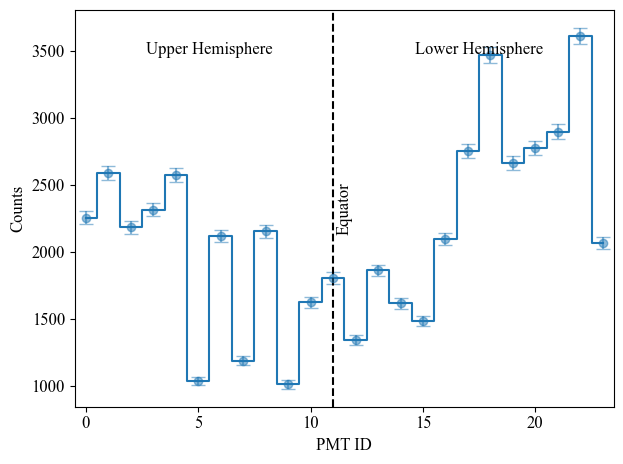

In [7]:
pmts = data.iloc[:,3]
plot_hits_pmt(pmts)

In [8]:
# calculates coincidence rates, time differences, etc.

time_window = 20 # ns
unique_event = np.unique(data.iloc[:,0]) # unique events

time_diff_pmt = [[] for _ in range(24)] # time difference between first and last element depending on how many PMTs recorded hits in an event
time_event = [] # normalized time sequence for each event
count_pmt = np.zeros(24) # number of counts/hits per PMT

for j, ue in enumerate(unique_event): # loop over all unique event IDs
    mask_event = (data.iloc[:,0] == ue).values # mask for entries from the same event

    time = data.iloc[:,1][mask_event].values # all times of a given event
    pmts = data.iloc[:,3][mask_event].values # all PMTstime of a given event
    unique_pmt = np.unique(pmts) # unique PMTs

    time_sorted = np.sort(time) # sort event times
    time_normed = time_sorted - time_sorted[0] # normalized time to first entry

    mask_time = time_normed <= time_window # mask time with time window
    time_masked = time_normed[mask_time]

    if len(time_masked) > 1: # if there is more than one entry
        
        time_diff = time_masked[-1] - time_masked[0] # time difference between first element (=0) and last element
        
        time_event.append(time_masked) # save in list
        
        for i in range(len(unique_pmt)): # loop over number of unique PMTs = coincidence
            time_diff_pmt[i].append(time_diff)

    for i in range(len(unique_pmt)): # loop over number of unique PMTs = coincidence
        count_pmt[i] += len(time_masked)

time_event = np.array(time_event, dtype=object) # transform into array
time_diff_pmt = np.array(time_diff_pmt, dtype=object)

In [9]:
unique_event, counts = np.unique(data.iloc[:,0], return_counts=True) # unique events
np.sum(counts==1)

np.int64(38)

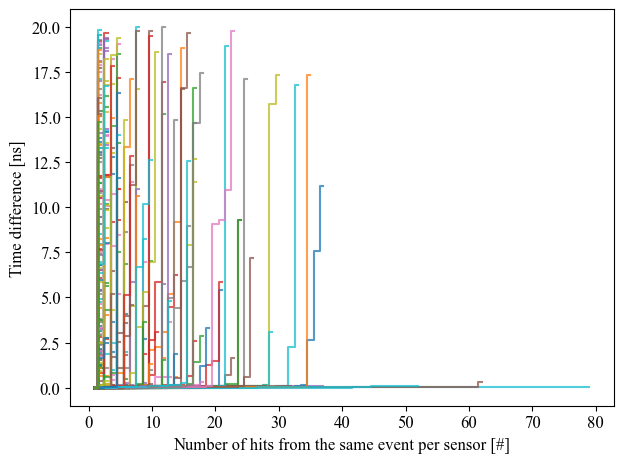

In [10]:
plot_time_event(time_event)

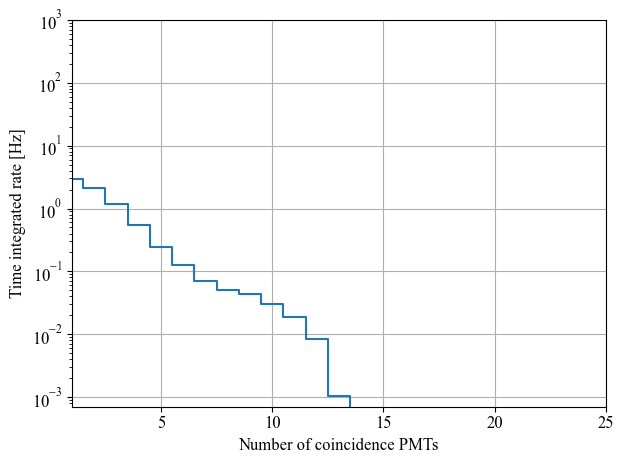

In [11]:
time_window = (data.iloc[:,1].max()-data.iloc[:,1].min())/1E9 # in s
coincidence_rate = count_pmt/time_window
normalized_rate = coincidence_rate/coincidence_rate[0]
plot_coincidence_rate(coincidence_rate)

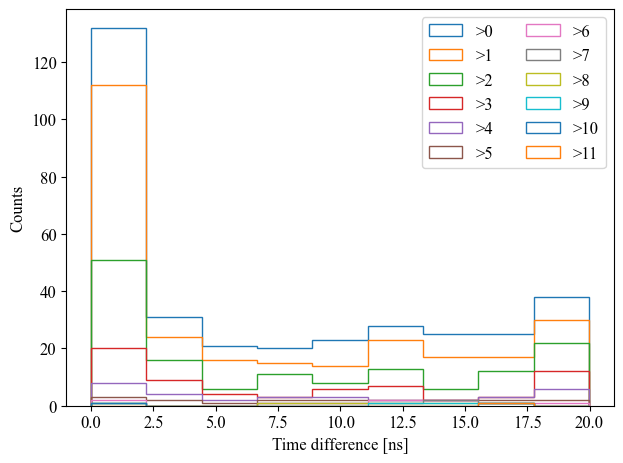

In [12]:
hist_time_diff(time_diff_pmt)

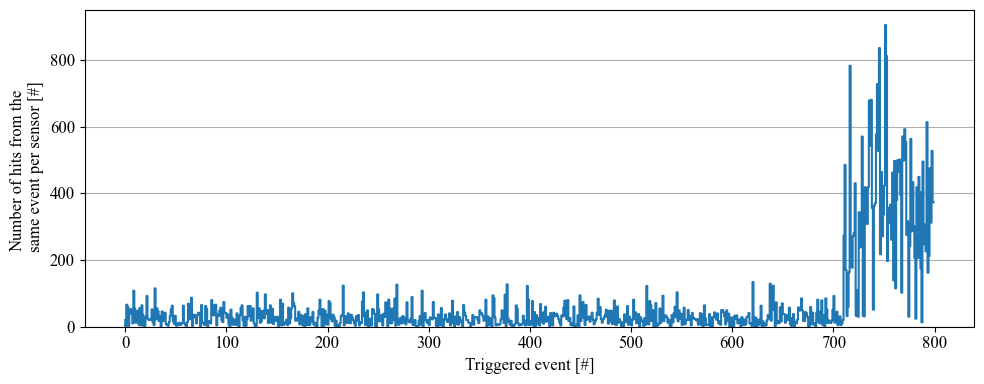

In [13]:
unique, counts = np.unique(data.iloc[:,0], return_counts=True)

fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.step(np.arange(len(unique)), counts)
#ax.set_xticklabels(unique)
#ax.set_ylim(1)
ax.set_xlabel("Triggered event [#]")
ax.set_ylabel("Number of hits from the \n same event per sensor [#]")
ax.grid(axis = "y")
plt.gca().set_ylim(bottom=0)
plt.tight_layout()